In [12]:
import agama
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

 [1] 4993 4996 5000 5004 5005 5010 5011 5016 5034 5035 5038 5041 5046 5099 5109
[16] 5112 5126 5127 5141 5187 5189 5195
[1] ""
 [1] -2946.0346  1319.7085   699.0081  1770.7141   776.6764  2774.9170
 [7] 10286.5760 -3029.6569 12221.5234 13797.9225  5231.4146  3746.7541
[13] 17915.4555 38922.7326 34605.7865 35163.6439 28495.7079 28148.4238
[19] 28207.5822 26797.4245 31035.3930 21056.1336

In [13]:
sim = "m12i"
snap = 214

# data_dir = "/Users/z5114326/Documents/GitHub/gc_statistics/data/"
sim_dir = "/Users/z5114326/Documents/simulations/"
data_dir = "/Users/z5114326/Documents/GitHub/gc_kinematics/data/"
potential_file = data_dir + "potentials/" + sim + "/snap_%d/combined_snap_%d.ini" % (snap, snap)

proc_file = sim_dir + sim + "/" + sim + "_processed.hdf5"
potential_file = data_dir + "potentials/" + sim + "/snap_%d/combined_snap_%d.ini" % (snap, snap)

proc_data = h5py.File(proc_file, "r")  # open processed data file

In [14]:
agama.setUnits(mass=1, length=1, velocity=1)
pot = agama.Potential(potential_file)
af = agama.ActionFinder(pot, interp=False)

/Users/z5114326/Documents/GitHub/gc_statistics/.venv/lib/python3.12/site-packages/agama/py/pygama.py:21: RuntimeWarning: setUnits() called after creating instances of Potential and other classes may lead to incorrect scaling of input/output data in their methods
  return _setUnits(**args)  # call the setUnits(...) function from the C++ extension module


In [39]:
snap_data = proc_data["it001"]["snapshots"]["snap214"]

lz = np.array(snap_data["lz"])
et = np.array(snap_data["et"])
ep = np.array(snap_data["ep_agama"])
ek = np.array(snap_data["ek"])

# Find the indices where lz is NaN
nan_indices = np.isnan(lz)

# Print the indices where NaN values are found
print(np.where(nan_indices))

(array([], dtype=int64),)


In [41]:
idx_test = 5004
lz_test = lz[idx_test]
et_test = et[idx_test]
ep_test = ep[idx_test]
ek_test = ek[idx_test]


print(lz_test, et_test, ep_test, ek_test)

776.6764274894176 4339.509615838171 -26095.59883124836 30435.10844708653


In [33]:
r_circs = pot.Rcirc(E=et_test)
xyz = np.column_stack((r_circs, r_circs * 0, r_circs * 0))
v_circs = np.sqrt(-r_circs * pot.force(xyz)[:, 0])
vel = np.column_stack((v_circs * 0, v_circs, v_circs * 0))
init_conds = np.concatenate((xyz, vel), axis=1)
lz_circ = af(init_conds)[:, 2]

r_circs

nan

In [22]:
lz_test / lz_circ

array([-0.07888132])

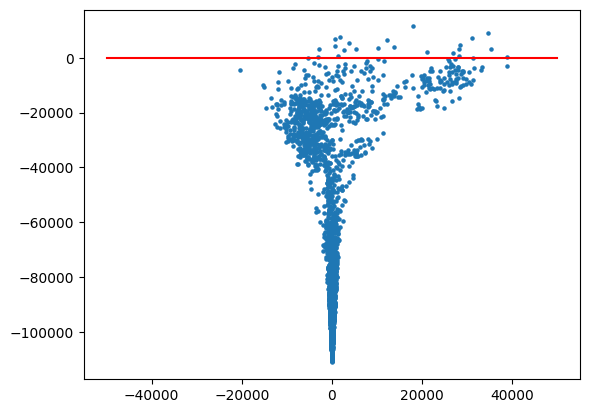

In [45]:
plt.scatter(lz, et, s=5)
plt.plot([-5e4, 5e4], [0, 0], "r")

In [46]:
proc_data.close()

In [ ]:
# r_lst = np.linspace(0.1, 500, 250)

# et_lst = []
# lz_lst = []
# for r in r_lst:
#     pos = [r, r * 0, r * 0]
#     v_circ = np.sqrt(-r * pot.force(pos)[0])
#     vel = [0, v_circ, 0]

#     initcond = pos + vel

#     ep = pot.potential(pos)
#     ek = 0.5 * np.linalg.norm(vel) ** 2
#     et = ek + ep

#     lz = af(initcond)[2]

#     et_lst.append(et)
#     lz_lst.append(lz)

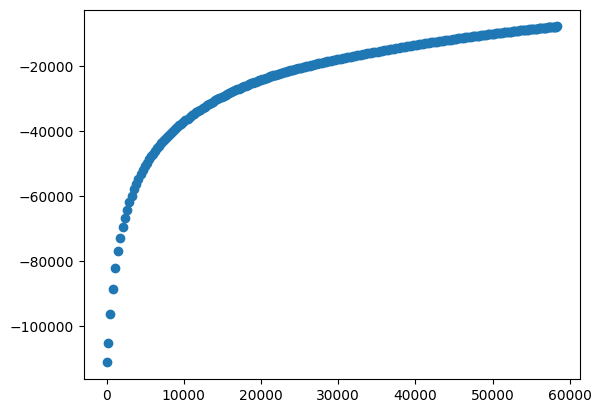

In [11]:
# plt.scatter(lz_lst, np.array(et_lst))
# plt.xscale('log')
# plt.yscale('log')


In [115]:
# Define the 1/x function
def inverse_func(x, a, b, c, d):
    return a / ((x - c) ** b) + d

In [122]:
initial_guess = [-1e6, 0.5, 0, 0]
initial_guess = [-3.5e5, 0.5, 0, 0]

# Fit the data to the 1/x model
params, covariance = curve_fit(inverse_func, lz_lst, et_lst, p0=initial_guess)

# Extract the fitted parameters
a, b, c, d = params
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}, d = {d}")

Fitted parameters: a = -6997827.890258315, b = 0.49889733064484165, c = -363.0791864583225, d = 24041.97805734597


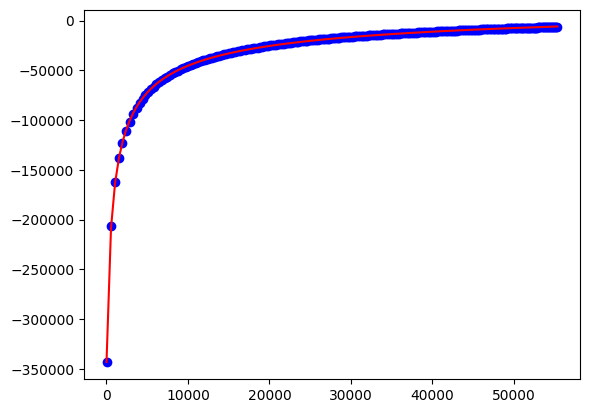

In [123]:
# Plot the data and the fitted 1/x curve
plt.scatter(lz_lst, et_lst, label="Data", color="blue")
plt.plot(lz_lst, inverse_func(np.array(lz_lst), *params), label="Fitted 1/x curve", color="red")
# plt.xscale("log")
# plt.yscale("log")


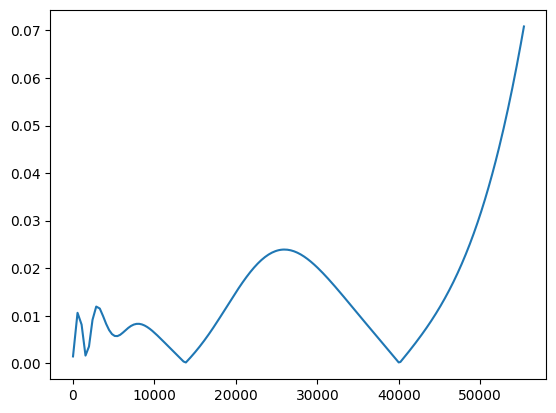

In [124]:
et_fit_lst = inverse_func(np.array(lz_lst), *params)

d_et = np.abs(np.array(et_lst) - et_fit_lst) / np.abs(np.array(et_lst))
plt.plot(lz_lst, d_et)

In [222]:
def norm_func(lz_lst, et_lst):
    lz_lst_norm = np.array(lz_lst) / np.array(lz_lst)
    et_lst_norm = np.array(et_lst) / np.abs(np.min(et_lst))

    return lz_lst_norm, et_lst_norm

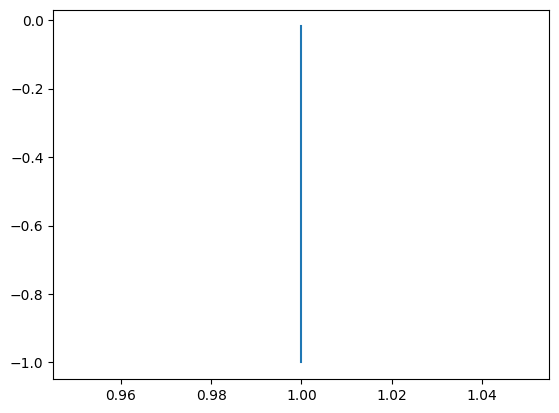

In [226]:
lz_lst_norm, et_lst_norm = norm_func(lz_lst, et_lst)

plt.plot(lz_lst_norm, et_lst_norm)